# PRCP-1026 Teaching Assistance


### PROBLEM STATEMENT

The objective of this project is to analyze and classify teaching performance evaluations of Teaching Assistants  at the Statistics Department of the University of Wisconsin-Madison. The dataset contains evaluations from three regular semesters and two summer semesters, assessing various factors that influence TA performance.

### ATTRIBUTE INFORMATION

1. Whether of not the TA is a native English speaker (binary); 1=English speaker, 2=non-English speaker

2. Course instructor (categorical, 25 categories)

3. Course (categorical, 26 categories)

4. Summer or regular semester (binary) 1=Summer, 2=Regular

5. Class size (numerical)

6. Class attribute (categorical) 1=Low, 2=Medium, 3=High


## 1.IMPORTING LIBRARIES

In [1]:
# Importing numpy library for working with arrays
import numpy as np

# Importing pandas library for working with data sets
import pandas as pd

# Importing seaborn library for visualization
import seaborn as sns

# Importing matplotlib.pyplot for visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Importing warnings for disable warnings from the code
import warnings

# To ignore the warnings
warnings.filterwarnings('ignore')

# Importing ProfileReport from ydata_profiling
from ydata_profiling import ProfileReport

# Importing OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

# Importing LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Importing MinMaxScaler 
from sklearn.preprocessing import MinMaxScaler

# Importing StandardScaler
from sklearn.preprocessing import StandardScaler

# Importing train_test_split
from sklearn.model_selection import train_test_split

# Importing metrics for evaluating the performance of Regression models
from sklearn.metrics import *

# Importing LogisticRegression model from sklearn
from sklearn.linear_model import LogisticRegression

# Importing KNeighborsClassifier from sklearn
from sklearn.neighbors import KNeighborsClassifier

# Importing SVC model from sklearn
from sklearn.svm import SVC

# Importing DecisionTreeClassifier model from sklearn
from sklearn.tree import DecisionTreeClassifier

# Importing RandomForestClassifier model from sklearn
from sklearn.ensemble import RandomForestClassifier

# Importing MLPClassifier model from sklearn
from sklearn.neural_network import MLPClassifier

# Importing GridSearchCV for Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Importing RandomizedSearchCV for Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

#Importing ensemble learning 
from sklearn.ensemble import *

#importing naive bayes 
from sklearn.naive_bayes import GaussianNB

D:\newjurney\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## 2.DATA LOADING

In [2]:
#Loading dataset using pandas
data=pd.read_csv('tae.csv',header=None)

In [5]:
 data

,native_English_speaker,Course_instructor,Course,semester_type,Class_size,Class_attribute
0,1,23,3,1,19,3
1,2,15,3,1,17,3
2,1,23,3,2,49,3
3,1,5,2,2,33,3
4,2,7,11,2,55,3
...,...,...,...,...,...,...
146,2,3,2,2,26,1
147,2,10,3,2,12,1
148,1,18,7,2,48,1
149,2,22,1,2,51,1


In [3]:
# Assigning column names to the data 
data.columns=['native_English_speaker','Course_instructor','Course','semester_type','Class_size','Class_attribute']

In [4]:
##visualizing the data
data

,native_English_speaker,Course_instructor,Course,semester_type,Class_size,Class_attribute
0,1,23,3,1,19,3
1,2,15,3,1,17,3
2,1,23,3,2,49,3
3,1,5,2,2,33,3
4,2,7,11,2,55,3
...,...,...,...,...,...,...
146,2,3,2,2,26,1
147,2,10,3,2,12,1
148,1,18,7,2,48,1
149,2,22,1,2,51,1


## 3.Checking Duplicated values

In [6]:
len(data[data.duplicated()])

41

In [7]:
data.drop_duplicates(inplace=True)

 ## 4.BASIC CHECKS

In [193]:
#Visualizing head of the data
data.head()

,native_English_speaker,Course_instructor,Course,semester_type,Class_size,Class_attribute
0,1,23,3,1,19,3
1,2,15,3,1,17,3
2,1,23,3,2,49,3
3,1,5,2,2,33,3
4,2,7,11,2,55,3


In [194]:
#Visualizing tail of the data
data.tail()

,native_English_speaker,Course_instructor,Course,semester_type,Class_size,Class_attribute
146,2,3,2,2,26,1
147,2,10,3,2,12,1
148,1,18,7,2,48,1
149,2,22,1,2,51,1
150,2,2,10,2,27,1


In [195]:
#Checking the shape of the dataframe
data.shape

(110, 6)

Insight:
    
    the Data have 110 rows and 6 columns (5 features , 1 target) after removing duplicated  values

In [196]:
# Checking basic information about the data.
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110 entries, 0 to 150
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   native_English_speaker  110 non-null    int64
 1   Course_instructor       110 non-null    int64
 2   Course                  110 non-null    int64
 3   semester_type           110 non-null    int64
 4   Class_size              110 non-null    int64
 5   Class_attribute         110 non-null    int64
dtypes: int64(6)
memory usage: 6.0 KB


Insights

1.the dataset doesn't have any null values 

2.the features and target are int datatype

In [197]:
# Checking names of the columns in the data
data.columns

Index(['native_English_speaker', 'Course_instructor', 'Course',
       'semester_type', 'Class_size', 'Class_attribute'],
      dtype='object')

### 4.1 domain analysis

1.native_English_speaker 
        
values in this column is 1 denotes English Speaker, 2 denotes Non-English Speaker
Language proficiency of the TA, which may impact teaching effectiveness. 

2.Course_instructor

25 distinct categories representing different instructors in this feature.
The instructor's influence on TA performance.

3.Course

26 distinct categories representing different courses in this feature,
The specific course that the TA is associated with, affecting performance.

4.semester_type

values in this feature semester_type 1 denotes Summer, 2denotes Regular,
it  indicates whether the semester type has an impact on teaching performance.

5.Class_size

Integer values indicating the number of students in the class,
Larger classes may present challenges, influencing TA performance.


6.Class_attribute

Values in this column denotes   1=Low, 2=Medium, 3=High,
Represents the overall evaluation of the TA's performance, used as the classification label.

In [198]:
# Checking basic statistical information for numerical columns
data.describe().T

,count,mean,std,min,25%,50%,75%,max
native_English_speaker,110.0,1.772727,0.420988,1.0,2.00,2.0,2.0,2.0
Course_instructor,110.0,14.027273,6.780245,1.0,9.00,14.0,20.0,25.0
Course,110.0,8.145455,7.163665,1.0,3.00,3.5,15.0,26.0
semester_type,110.0,1.863636,0.344745,1.0,2.00,2.0,2.0,2.0
Class_size,110.0,27.281818,13.141525,3.0,18.25,25.0,37.0,66.0
Class_attribute,110.0,2.018182,0.823751,1.0,1.00,2.0,3.0,3.0


Insight:

1.Language Impact: Since most TAs are non-native English speakers, it would be interesting to see if language proficiency significantly affects performance.

2.Instructor and Course Influence: Some instructors or courses may consistently result in higher or lower performance ratings, indicating potential biases or teaching challenges.

3.Class Size Considerations: Larger classes might correlate with lower performance due to increased workload and communication challenges.

4.Semester Variability: The difference between regular and summer semester evaluations could reveal insights into seasonal effects on teaching effectiveness.

5.Balanced Classes: Since the target variable is balanced, classification models are less likely to suffer from class imbalance issues.

In [132]:
#Visualizing value_couts for the data
for i in data:
    print(data[i].value_counts(ascending=True))
    print("____________________")

native_English_speaker
1    25
2    85
Name: count, dtype: int64
____________________
Course_instructor
19     1
24     1
4      1
21     1
12     2
11     2
3      2
25     2
16     3
2      3
1      3
5      3
8      4
17     4
10     5
20     5
15     5
6      5
18     6
14     6
7      6
9      7
13    10
22    10
23    13
Name: count, dtype: int64
____________________
Course
10     1
20     1
24     1
26     1
23     1
12     1
14     1
19     1
4      1
18     2
6      2
16     2
13     2
9      2
25     2
21     2
22     2
8      3
5      3
7      5
11     5
17     7
15     7
1     11
2     12
3     32
Name: count, dtype: int64
____________________
semester_type
1    15
2    95
Name: count, dtype: int64
____________________
Class_size
26    1
28    1
5     1
32    1
34    1
66    1
46    1
43    1
3     1
7     1
35    1
49    1
9     1
54    1
16    1
55    1
33    1
44    1
18    2
45    2
15    2
48    2
36    2
51    2
39    2
13    2
22    2
14    2
12    2
58    2
30    2


## 5.EDA Exploratory Data Analysis

#### 5.1 Univariate Analysis

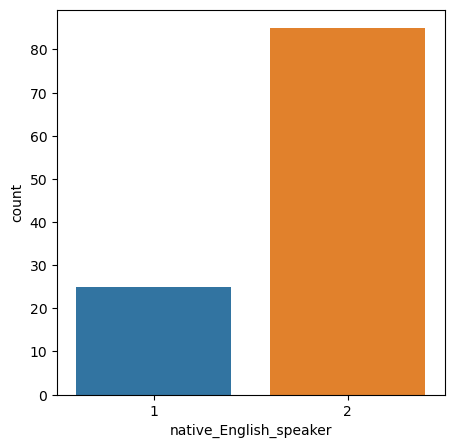

In [133]:
#univariate analysis for native_English_speaker
plt.figure(figsize=(5,5))
sns.countplot(data,x='native_English_speaker')
plt.show()

In [16]:
#Visualizing the count of the native_English_speaker 
print('the number english speaker from the  native_English_speaker column:',len(data[data['native_English_speaker']==1]))

print('the number non-english speaker from the  native_English_speaker column:',len(data[data['native_English_speaker']==2]))

the number english speaker from the  native_English_speaker column: 29
the number non-english speaker from the  native_English_speaker column: 122


Insight 

In native_English_speaker the total row is 110 from this data 25  teaching assistant are native_English_speaker and 85 teaching assistant are non-native_English_speaker

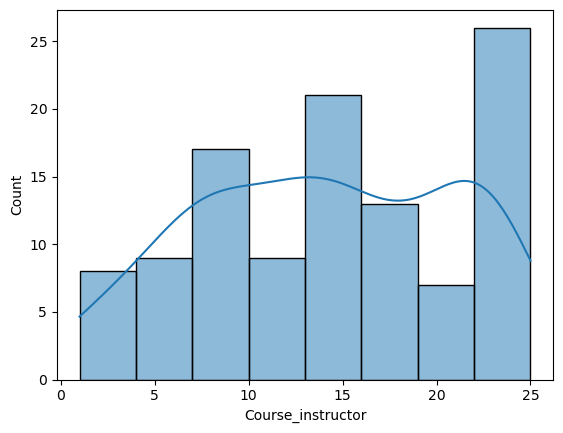

In [134]:
#univariate analysis for Course_instructor
sns.histplot(data,x='Course_instructor',kde=True)
plt.show()

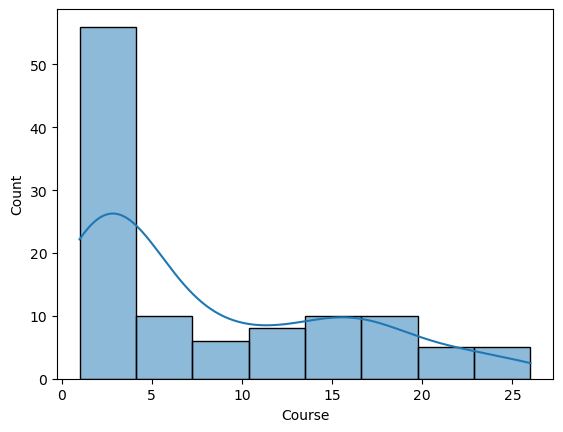

In [135]:
#univariate analysis for Course 
sns.histplot(data,x='Course',kde=True)
plt.show()

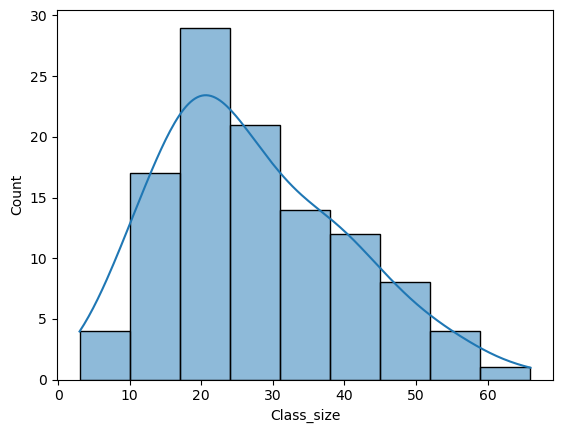

In [136]:
#univariate analysis for Class_size 
sns.histplot(data,x='Class_size',kde=True)
plt.show()

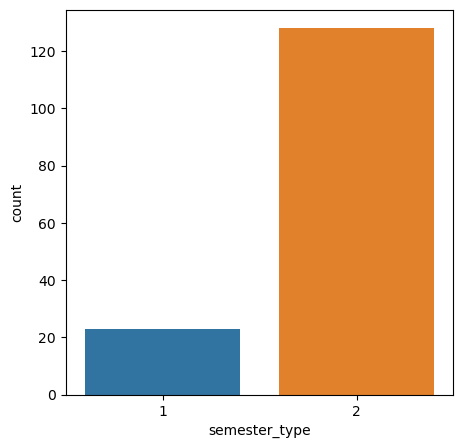

In [20]:
#univariate analysis for semester_type
plt.figure(figsize=(5,5))
sns.countplot(data,x='semester_type')
plt.show()

In [21]:
#Visualizing the count of the semester_type based on summer and regular
summer = []
regular = []

for idx, row in data.iterrows():
    if row['semester_type'] == 1:
        summer.append(row)  # Append the whole row if it's a summer semester
    else:
        regular.append(row)  # Append the whole row if it's a regular semester

print("Number of summer semester entries:", len(summer))
print("Number of regular semester entries:", len(regular))


Number of summer semester entries: 23
Number of regular semester entries: 128


Insight

1.The summer semester has significantly fewer teaching assignments (23) compared to the regular semester (95). This is likely due to fewer courses and smaller class sizes during the summer.

2.The regular semester is the primary time for teaching assistants, and a larger variety of courses and instructors are involved.

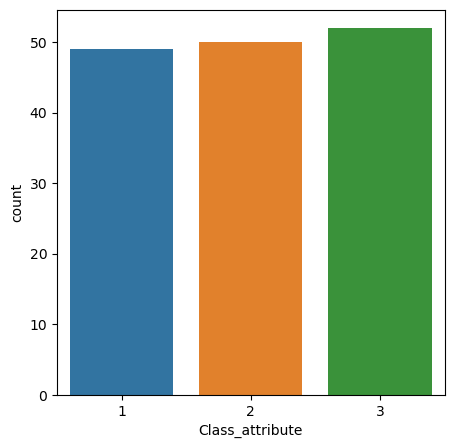

In [22]:
#univariate analysis for  Class_attribute
plt.figure(figsize=(5,5))
sns.countplot(data,x='Class_attribute')
plt.show()

In [23]:
#Visualizing the count of the  based  on ) 1=Low, 2=Medium, 3=High
low = []
medium = []
high = []

for index, row in data.iterrows():
    if row['Class_attribute'] == 1:
        low.append(row)
    elif row['Class_attribute'] == 2:
        medium.append(row)
    else:
        high.append(row)

print("Number of low entries:", len(low))
print("Number of medium entries:", len(medium))
print("Number of high entries:", len(high))


Number of low entries: 49
Number of medium entries: 50
Number of high entries: 52


Insight

1.The distribution of the Class Attribute across the three categories is nearly equal. With 36, 36, and 38 entries, the dataset does not suffer from major class imbalance.

### 5.2  Bivariate analysis

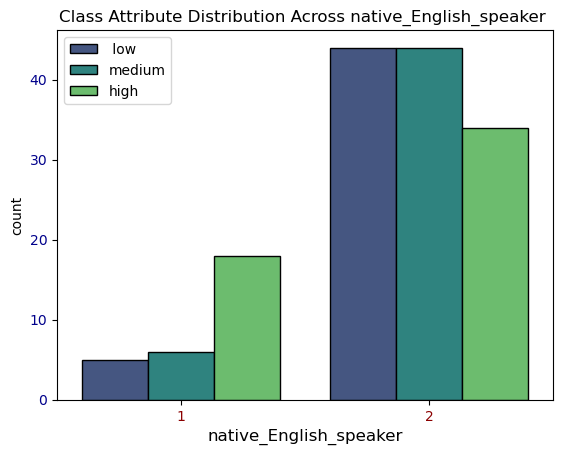

In [24]:
# Bivariate analysis for the native_English_speaker with class_attribute
sns.countplot(data = data,x = 'native_English_speaker',hue = 'Class_attribute',edgecolor = 'black',palette = 'viridis')
plt.xlabel('native_English_speaker',fontsize = 12,color = 'black')
plt.ylabel('count',color = 'black')
plt.title('Class Attribute Distribution Across native_English_speaker ')
plt.xticks(color = 'darkred')
plt.yticks(color = 'darkblue')
plt.legend([' low','medium','high'])
plt.show()


Insight

1.In native english speaker there are entries less than 10 for low and medium and entry for high is nearly 19 
2.In non native english speaker entries like low and medium are same and high is lesser than low & medium

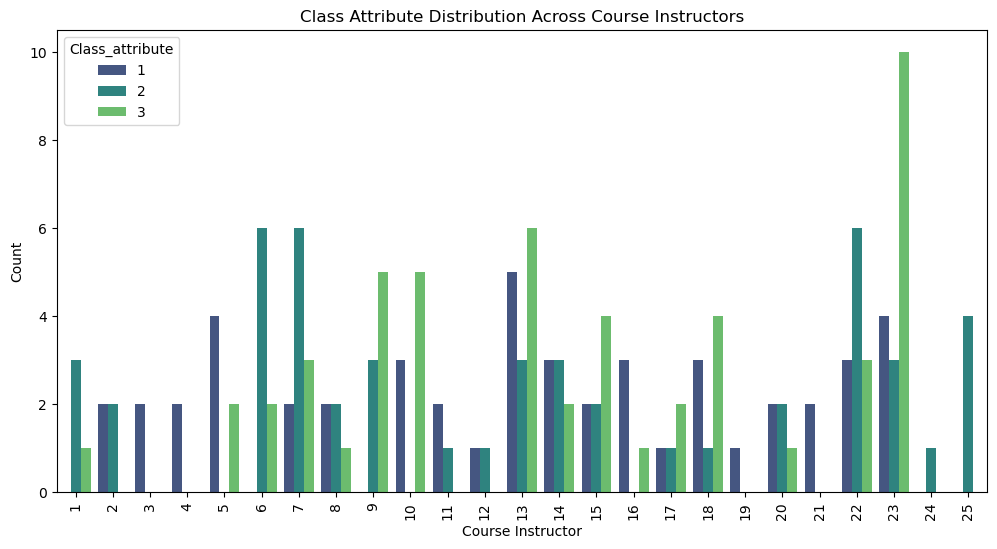

In [25]:
# Bivariate analysis for the Course_instructor  with class_attribute
plt.figure(figsize=(12, 6))
sns.countplot(data,x='Course_instructor',hue="Class_attribute",palette='viridis')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('Class Attribute Distribution Across Course Instructors')
plt.xlabel('Course Instructor')
plt.ylabel('Count')
plt.show()

In [26]:
# Visualizing the Course_instructor how have high class attribute than other
data[(data['Course_instructor']==23) & (data['Class_attribute']==3)]

,native_English_speaker,Course_instructor,Course,semester_type,Class_size,Class_attribute
0,1,23,3,1,19,3
2,1,23,3,2,49,3
5,2,23,3,1,20,3
39,1,23,3,1,19,3
41,1,23,3,2,49,3
44,2,23,3,1,20,3
78,1,23,3,1,25,3
86,2,23,3,1,20,3
87,1,23,3,1,20,3
88,1,23,3,2,38,3


Insight

Course Instructor 23 has a higher number of entries in the High class attribute category.

Course Instructor 13 has a higher number of entries in the Low class attribute category.

Course Instructors 3,4,19,21  has entries exclusively in the Low class attribute category.

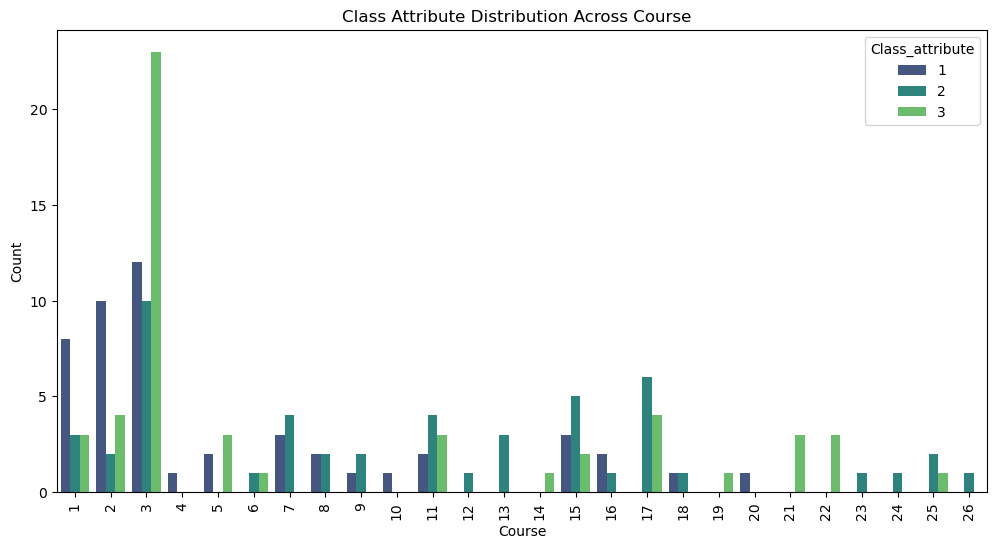

In [27]:
# Bivariate analysis for the Course   with class_attribute
plt.figure(figsize=(12, 6))
sns.countplot(data,x='Course',hue="Class_attribute",palette='viridis')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('Class Attribute Distribution Across Course  ')
plt.xlabel('Course')
plt.ylabel('Count')
plt.show()

In [28]:
#Visualizing the course which have a highest entries on high class attribute category.
data[(data['Course']==3)&(data['Class_attribute']==3)]

,native_English_speaker,Course_instructor,Course,semester_type,Class_size,Class_attribute
0,1,23,3,1,19,3
1,2,15,3,1,17,3
2,1,23,3,2,49,3
5,2,23,3,1,20,3
7,2,10,3,2,27,3
8,1,22,3,1,58,3
9,2,15,3,1,20,3
39,1,23,3,1,19,3
40,2,15,3,1,17,3
41,1,23,3,2,49,3


Insight

1.Courses 21, 3, and 4 have exclusively Class Attribute 1 students

2.Courses 25 and 24 have 100% Class Attribute 2 students
Course 6 has 75% Class Attribute 2 students.

3.Courses 9 and 10 have 62.5% Class Attribute 3 students
Course 23 has 56.25% Class Attribute 3 students

4.Course 14 shows the most balanced distribution

5.Courses 4, 3, and 25 show complete imbalance (100% of one attribute)

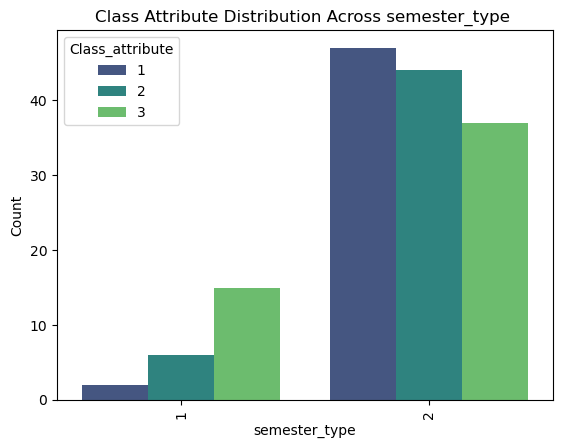

In [29]:
# Bivariate analysis for the  semester_type  with class_attribute
 
sns.countplot(data,x='semester_type',hue='Class_attribute',palette='viridis')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('Class Attribute Distribution Across semester_type ')
plt.xlabel('semester_type')
plt.ylabel('Count')
plt.show()

Insight

1.The strong presence of “High” class attributes in the Summer could imply that the courses offered during this period are designed differently—perhaps they are more intensive, advanced, or attract a specific student cohort.

2.This difference in class attribute distributions could affect teaching loads, resource allocation, or even student outcomes between the two semester types.

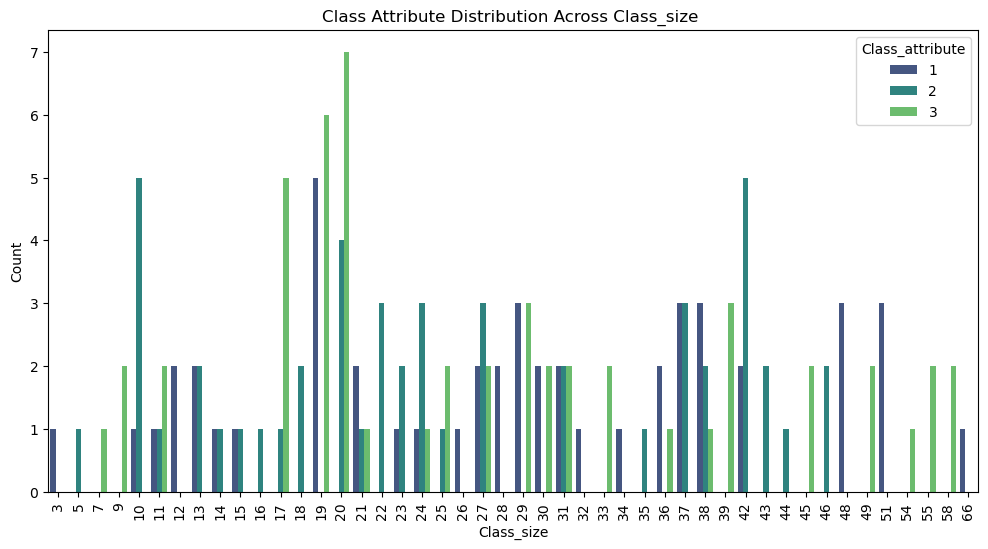

In [30]:
# Bivariate analysis for the  Class_size  with class_attribute
plt.figure(figsize=(12, 6))
sns.countplot(data,x='Class_size',hue='Class_attribute',palette='viridis')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('Class Attribute Distribution Across Class_size ')
plt.xlabel('Class_size')
plt.ylabel('Count')
plt.show()

Insight

Low attribute classes have the highest median class size (29 students)

Medium attribute classes have the lowest median (23.5 students)

High attribute classes fall in between (25 students)

### 5.3 Multivariate analysis

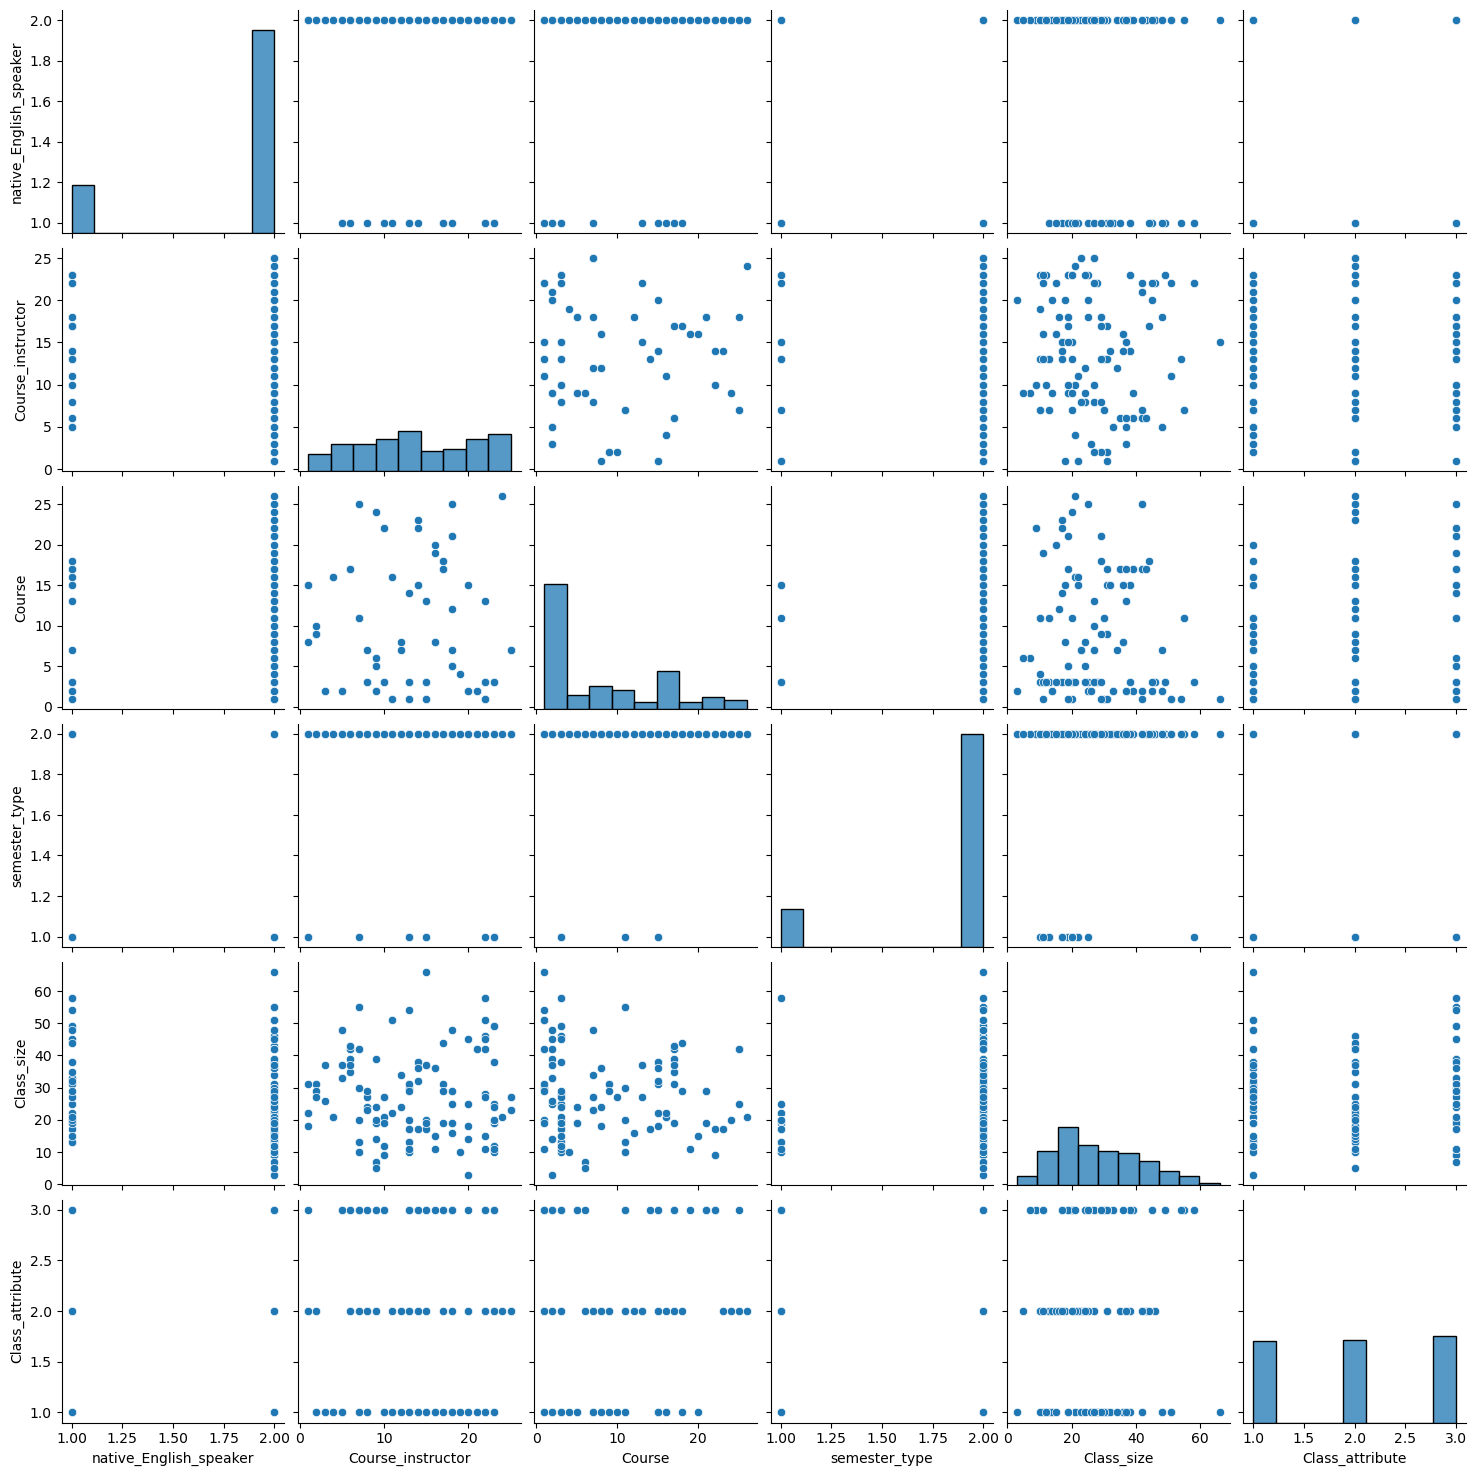

In [31]:
# multivariate analysis
sns.pairplot(data)
plt.show()

Insight

1.1.In native english speaker there are entries less than 10 for low and medium and entry for high is nearly 19 2.In non native english speaker entries like low and medium are same and high is lesser than low & medium

2.The strong presence of “High” class attributes in the Summer could imply that the courses offered during this period are designed differently—perhaps they are more intensive, advanced, or attract a specific student cohort.

3.This difference in class attribute distributions could affect teaching loads, resource allocation, or even student outcomes between the two semester types.

## 6.Data Preprocessing

#### 6.1 Checking null values

In [393]:
#checking null values
data.isnull().sum()

native_English_speaker    0
Course_instructor         0
Course                    0
semester_type             0
Class_size                0
Class_attribute           0
dtype: int64

Insight 

1. data doesn't have null values

#### 6.2 Handling outliers

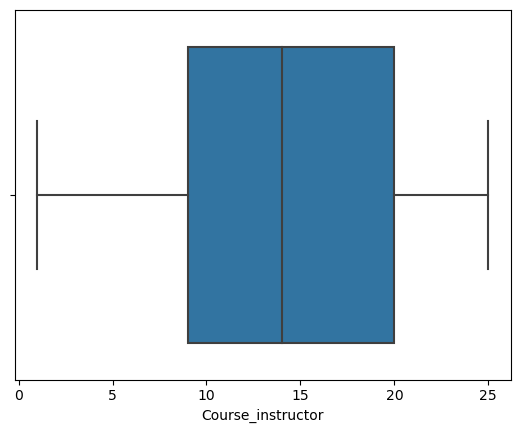

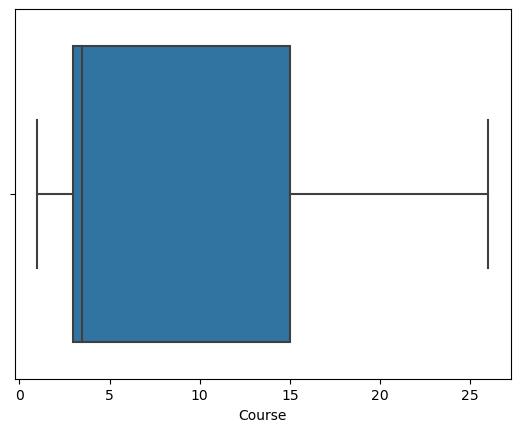

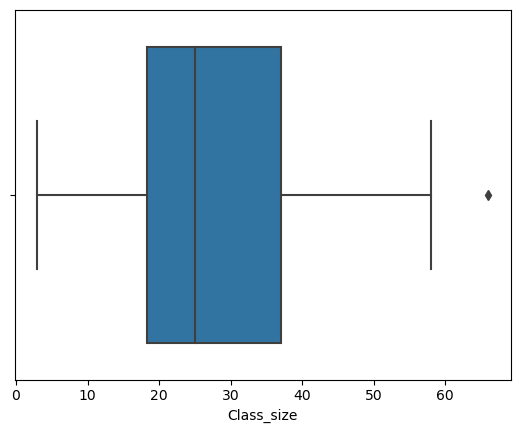

In [138]:
#checking outliers using boxplot
col=data[["Course_instructor",'Course','Class_size']]
for i in col:
    sns.boxplot(data,x=i)
    plt.show()
    

Insight

we have outliers in class size variable and we going to handle outlier by using IQR`

In [8]:
##handling outliers using IQR
Q1=data['Class_size'].quantile(0.25)
Q3=data['Class_size'].quantile(0.75)
IQR=Q3-Q1
lower_limit=Q1-(1.5*IQR)
upper_limit=Q3+(1.5*IQR)
print("lower_limit",lower_limit)
print("Upper_limit",upper_limit)

lower_limit -9.875
Upper_limit 65.125


In [9]:
#visualizing the outlier 
data[(data['Class_size']>upper_limit)  ]

,native_English_speaker,Course_instructor,Course,semester_type,Class_size,Class_attribute
116,2,15,1,2,66,1


In [10]:
data[(data['Class_size'])<lower_limit]

,native_English_speaker,Course_instructor,Course,semester_type,Class_size,Class_attribute


In [11]:
#Capping the outlier with Statistical Measure median
median=data['Class_size'].median()
data['Class_size'] = np.where(data['Class_size'] > upper_limit, median, data['Class_size'])

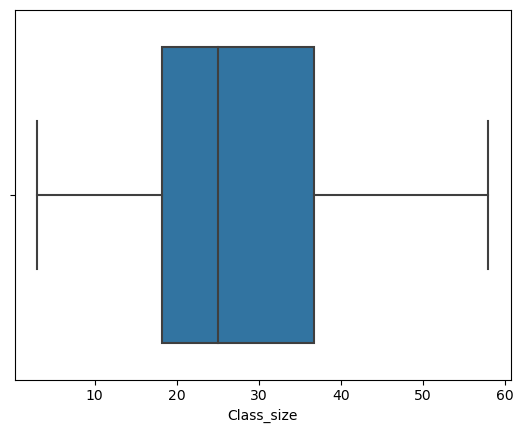

In [12]:
#visualizing the boxplot for classsize feature after outlier handle
sns.boxplot(data,x='Class_size')
plt.show()

### 6.2 Remapping the labels in categorical values

In [13]:
data['native_English_speaker'] = data['native_English_speaker'].map({1: 1, 2: 0})
data['semester_type'] = data['semester_type'].map({1: 0, 2: 1})
data['Class_attribute'] = data['Class_attribute'].map({1: 0, 2: 1, 3: 2})

In [14]:
data

,native_English_speaker,Course_instructor,Course,semester_type,Class_size,Class_attribute
0,1,23,3,0,19.0,2
1,0,15,3,0,17.0,2
2,1,23,3,1,49.0,2
3,1,5,2,1,33.0,2
4,0,7,11,1,55.0,2
...,...,...,...,...,...,...
146,0,3,2,1,26.0,0
147,0,10,3,1,12.0,0
148,1,18,7,1,48.0,0
149,0,22,1,1,51.0,0


Insight

This standardization can improve model performance.


### 6.3 Scalling

In [15]:
data['Class_size']=MinMaxScaler().fit_transform(data[['Class_size']])

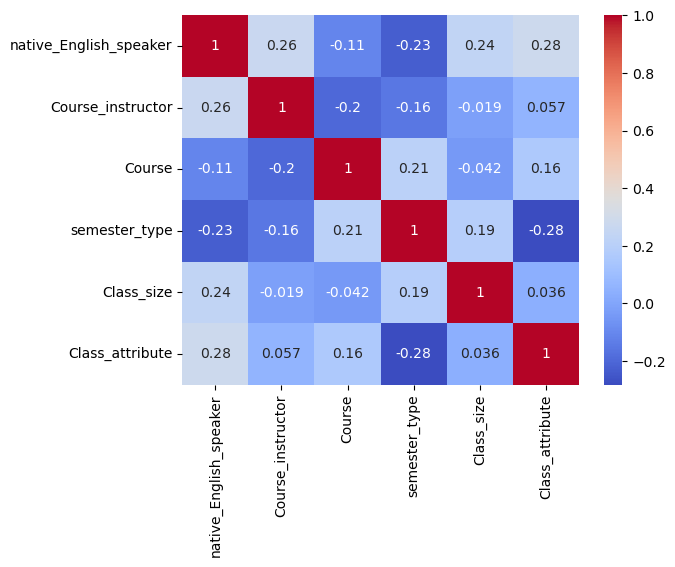

In [16]:
# Visualizing the correlation between the feature by using heatmap

sns.heatmap(data=data.corr(),annot=True,cmap='coolwarm')
plt.show()

Insight

1.No Strong Correlation: None of the features have a strong correlation (|r| > 0.7) with each other, indicating weak linear relationships.

2.Slight Negative Impact of Being a Native English Speaker: Native speakers show a slight negative correlation with class attribute, hinting that non-native speakers might perform marginally better.

3.Semester Type and Performance: The negative correlation between semester type and class attribute might suggest that semester type impacts performance slightly (e.g., summer vs. regular semesters).

4.Instructor Consistency: There is no strong link between instructors and class attributes, suggesting consistent teaching quality.

## 7.Data Splitting

In [17]:
#splitting the data into feature (x) and target (y)
x=data.drop("Class_attribute",axis=1)
y=data.Class_attribute
x

,native_English_speaker,Course_instructor,Course,semester_type,Class_size
0,1,23,3,0,0.290909
1,0,15,3,0,0.254545
2,1,23,3,1,0.836364
3,1,5,2,1,0.545455
4,0,7,11,1,0.945455
...,...,...,...,...,...
146,0,3,2,1,0.418182
147,0,10,3,1,0.163636
148,1,18,7,1,0.818182
149,0,22,1,1,0.872727


In [18]:
# splitting the data into train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42,stratify=y)

#### 7.1 Data Augmantation

In [19]:
#importing and  Initializing SMOTE
from imblearn.over_sampling import SMOTE 
smote=SMOTE(random_state=42)

In [20]:
# fitting and resampling training data
x_train_smote,y_train_smote=smote.fit_resample(x_train,y_train)

In [21]:
print(x_train_smote.shape)
print(y_train_smote.shape)

(81, 5)
(81,)


## 8.Model Creation

In [22]:
# Initializing LogisticRegression model
model=LogisticRegression()

# Fitting the training data to the Logistic Regression model
model.fit(x_train_smote,y_train_smote)

# predicting the target for testing data
y_pred=model.predict(x_test)

# Classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.53      0.82      0.64        11
           1       0.40      0.36      0.38        11
           2       0.67      0.36      0.47        11

    accuracy                           0.52        33
   macro avg       0.53      0.52      0.50        33
weighted avg       0.53      0.52      0.50        33



In [23]:
# Evaluating the LogisticRegression model's performance by  accuracy_score
print('The accuracy_score  is ',accuracy_score(y_test,y_pred))

# Pandas crosstab function for visualizing actual and predicted counts 
pd.crosstab(y_test,y_pred)

The accuracy_score  is  0.5151515151515151


col_0,0,1,2
Class_attribute,,,
0,9,2,0
1,5,4,2
2,3,4,4


### 8.1 Hyperparameter tuning for logistic regression

In [421]:
# Initializing LogisticRegression model
model_ht=LogisticRegression()

# Creating a dictionary with possible Hyperparameters
params={'penalty' : ['l1', 'l2', 'elasticnet'],
        'fit_intercept':[True,False],
        'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
        'random_state': list(range(0,48))
       }

# Initializing GridSearchCV
logistic_cv=GridSearchCV(estimator=model_ht,
                        param_grid=params,
                        scoring='accuracy',
                        n_jobs=-1,
                        verbose=3)

# Fitting the training data to the GridSearchCV
logistic_cv.fit(x_train_smote,y_train_smote)



Fitting 5 folds for each of 1728 candidates, totalling 8640 fits


GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'fit_intercept': [True, False],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'random_state': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                          12, 13, 14, 15, 16, 17, 18, 19, 20,
                                          21, 22, 23, 24, 25, 26, 27, 28, 29, ...],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='accuracy', verbose=3)

In [422]:
# Getting best hyperparameters
logistic_cv.best_params_

{'fit_intercept': True, 'penalty': 'l1', 'random_state': 0, 'solver': 'saga'}

### 8.1.2 best logisticRegression model

In [24]:
# Initializing LogisticRegression model
LogisticRegression_model=LogisticRegression(penalty='l1',fit_intercept=True,random_state=0,solver='saga')

# Fitting the training data to the Logistic Regression model
LogisticRegression_model.fit(x_train_smote,y_train_smote )

# predicting the target for testing data
y_pred=LogisticRegression_model.predict(x_test)
 
# Classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.53      0.73      0.62        11
           1       0.38      0.45      0.42        11
           2       0.60      0.27      0.38        11

    accuracy                           0.48        33
   macro avg       0.51      0.48      0.47        33
weighted avg       0.51      0.48      0.47        33



In [25]:
# Evaluating the LogisticRegression model's performance by accuracy_score
print('The accuracy_score is ',accuracy_score(y_test,y_pred))

# Pandas crosstab function for visualizing actual and predicted counts 
pd.crosstab(y_test,y_pred)

The accuracy_score is  0.48484848484848486


col_0,0,1,2
Class_attribute,,,
0,8,3,0
1,4,5,2
2,3,5,3


In [26]:
# accuracy_score for LogisticRegression model
LogisticRegression_accuracy_score=accuracy_score(y_test,y_pred)

### 8.2. K NEIGHBORS CLASSIFIER

In [427]:
# Initializing KNeighborsClassifier model
model=KNeighborsClassifier()

# Fitting the training data to the KNeighborsClassifier model
model.fit(x_train_smote,y_train_smote)

# predicting the target for testing data
y_pred=model.predict(x_test)
 

# Classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.44      0.73      0.55        11
           1       0.40      0.18      0.25        11
           2       0.50      0.45      0.48        11

    accuracy                           0.45        33
   macro avg       0.45      0.45      0.43        33
weighted avg       0.45      0.45      0.43        33



In [428]:
# Evaluating the KNeighborsClassifier model's performance by accuracy_score
print('The accuracy_score is ',accuracy_score(y_test,y_pred))

# Pandas crosstab function for visualizing actual and predicted counts 
pd.crosstab(y_test,y_pred)

The accuracy_score is  0.45454545454545453


col_0,0,1,2
Class_attribute,,,
0,8,1,2
1,6,2,3
2,4,2,5


###  8.2.1  Hyperparameter tuning for KNeighborsClassifier

In [429]:
# Initializing KNeighborsClassifier model
model_ht=KNeighborsClassifier()

# Creating a dictionary with possible Hyperparameters
params = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Initializing GridSearchCV
KNN_cv=GridSearchCV(estimator=model_ht,
                        param_grid=params,
                        scoring='accuracy',
                        n_jobs=-1,
                        cv=2,
                        verbose=3)

# Fitting the training data to the GridSearchCV
KNN_cv.fit(x_train_smote,y_train_smote) 

Fitting 2 folds for each of 42 candidates, totalling 84 fits


GridSearchCV(cv=2, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=3)

In [430]:
# Getting best hyperparameters
KNN_cv.best_params_

{'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}

### 8.2.2  Best KNeighborsClassifier model

In [27]:
# Initializing KNeighborsClassifier model
KNeighborsClassifier_model=KNeighborsClassifier(n_neighbors=3,weights='uniform',metric='euclidean')

# Fitting the training data to the KNeighborsClassifier model
KNeighborsClassifier_model.fit(x_train_smote,y_train_smote)

# predicting the target for testing data
y_pred=KNeighborsClassifier_model.predict(x_test)

# Classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.40      0.73      0.52        11
           1       0.50      0.09      0.15        11
           2       0.36      0.36      0.36        11

    accuracy                           0.39        33
   macro avg       0.42      0.39      0.34        33
weighted avg       0.42      0.39      0.34        33



In [28]:
# Evaluating the KNeighborsClassifier model's performance by  accuracy_score
print('The accuracy_score is ',accuracy_score(y_test,y_pred))

# Pandas crosstab function for visualizing actual and predicted counts 
pd.crosstab(y_test,y_pred)

The accuracy_score is  0.3939393939393939


col_0,0,1,2
Class_attribute,,,
0,8,0,3
1,6,1,4
2,6,1,4


In [30]:
# accuracy_score for KNeighborsClassifier model
KNeighborsClassifier_accuracy_score=accuracy_score(y_test,y_pred)

### 8.3  SUPPORT VECTOR MACHINE 

In [434]:
# Initializing SVC model
model=SVC()

# Fitting the training data to the SVC model
model.fit(x_train_smote,y_train_smote)

# predicting the target for testing data
y_pred=model.predict(x_test)

# Classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.41      0.82      0.55        11
           1       0.33      0.18      0.24        11
           2       0.20      0.09      0.12        11

    accuracy                           0.36        33
   macro avg       0.31      0.36      0.30        33
weighted avg       0.31      0.36      0.30        33



In [435]:
# Evaluating the SVC model's performance by  accuracy_score
print('Theaccuracy_score is ',accuracy_score(y_test,y_pred))

# Pandas crosstab function for visualizing actual and predicted counts 
pd.crosstab(y_test,y_pred)

Theaccuracy_score is  0.36363636363636365


col_0,0,1,2
Class_attribute,,,
0,9,0,2
1,7,2,2
2,6,4,1


### 8.3.1 Hyperparameter tuning for Support Vector Machine

In [436]:
# Initializing SVC model
model_ht=SVC()

# Creating a dictionary with possible Hyperparameters
params={'kernel' : ['linear', 'rbf', 'sigmoid'],
        'gamma' : ['scale', 'auto'],
        'random_state': list(range(0,48))
       }

# Initializing GridSearchCV
svm_cv=GridSearchCV(estimator=model_ht,
                        param_grid=params,
                        scoring='accuracy',
                        n_jobs=-1,
                    cv=2,
                        verbose=3)

# Fitting the training data to the GridSearchCV
svm_cv.fit(x_train_smote,y_train_smote)

Fitting 2 folds for each of 288 candidates, totalling 576 fits


GridSearchCV(cv=2, estimator=SVC(), n_jobs=-1,
             param_grid={'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'sigmoid'],
                         'random_state': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                          12, 13, 14, 15, 16, 17, 18, 19, 20,
                                          21, 22, 23, 24, 25, 26, 27, 28, 29, ...]},
             scoring='accuracy', verbose=3)

In [437]:
# Getting best hyperparameters
svm_cv.best_params_

{'gamma': 'scale', 'kernel': 'linear', 'random_state': 0}

#### 8.3.2. Best SVC model

In [31]:
# Initializing SVC model
SVC_model=SVC(gamma='scale',kernel='linear',random_state=0)

# Fitting the training data to the SVC model
SVC_model.fit(x_train_smote,y_train_smote)

# predicting the target for testing data
y_pred=SVC_model.predict(x_test)

# Classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.53      0.82      0.64        11
           1       0.36      0.36      0.36        11
           2       0.80      0.36      0.50        11

    accuracy                           0.52        33
   macro avg       0.56      0.52      0.50        33
weighted avg       0.56      0.52      0.50        33



In [32]:
# Evaluating the SVC model's performance by accuracy_score
print('The accuracy_scoreis ',accuracy_score(y_test,y_pred))

# Pandas crosstab function for visualizing actual and predicted counts 
pd.crosstab(y_test,y_pred)

The accuracy_scoreis  0.5151515151515151


col_0,0,1,2
Class_attribute,,,
0,9,2,0
1,6,4,1
2,2,5,4


In [33]:
# accuracy_score for SVC model
SVC_accuracy_score=accuracy_score(y_test,y_pred)

### 8.4. DECISION TREE

In [442]:
# Initializing DecisionTreeClassifier model
model=DecisionTreeClassifier()

# Fitting the training data to the DecisionTreeClassifier model
model.fit(x_train_smote,y_train_smote)

# predicting the target for testing data
y_pred=model.predict(x_test)

# Classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.44      0.36      0.40        11
           1       0.27      0.27      0.27        11
           2       0.38      0.45      0.42        11

    accuracy                           0.36        33
   macro avg       0.37      0.36      0.36        33
weighted avg       0.37      0.36      0.36        33



In [443]:
# Evaluating the DecisionTreeClassifier model's performance by accuracy_score
print('The accuracy_score is ',accuracy_score(y_test,y_pred))

# Pandas crosstab function for visualizing actual and predicted counts 
pd.crosstab(y_test,y_pred)

The accuracy_score is  0.36363636363636365


col_0,0,1,2
Class_attribute,,,
0,4,4,3
1,3,3,5
2,2,4,5


### 8.4.1. Hyperparameter tuning for Decision Tree

In [444]:
# Initializing DecisionTreeClassifier model
model_ht=DecisionTreeClassifier()

# Creating a dictionary with possible Hyperparameters
params={'criterion' : ["gini",'entropy'],
        'splitter' : [ "random",'best'],
        'max_depth': [1,5,7,9,12,14,15,17,18,20],
        'min_samples_split':list(range(0,5)),
        'min_samples_leaf':list(range(0,5)),
        'random_state':[10,20,30,40,42]}

# Initializing GridSearchCV
tree_cv=GridSearchCV(estimator=model_ht,
                        param_grid=params,
                        scoring='accuracy',
                        n_jobs=-1,
                        cv=2,
                        verbose=3)

# Fitting the training data to the GridSearchCV
tree_cv.fit(x_train_smote,y_train_smote)

Fitting 2 folds for each of 5000 candidates, totalling 10000 fits


GridSearchCV(cv=2, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 5, 7, 9, 12, 14, 15, 17, 18, 20],
                         'min_samples_leaf': [0, 1, 2, 3, 4],
                         'min_samples_split': [0, 1, 2, 3, 4],
                         'random_state': [10, 20, 30, 40, 42],
                         'splitter': ['random', 'best']},
             scoring='accuracy', verbose=3)

In [445]:
# Getting best hyperparameters
tree_cv.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'random_state': 40,
 'splitter': 'random'}

#### 8.4.2. Best DecisionTreeClassifier model

In [34]:
# Initializing DecisionTreeClassifier model
DecisionTreeClassifier_model=DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_leaf=1,min_samples_split=4 ,splitter='random',random_state=40)

# Fitting the training data to the DecisionTreeClassifier model
DecisionTreeClassifier_model.fit(x_train_smote,y_train_smote)

# predicting the target for testing data
y_pred=DecisionTreeClassifier_model.predict(x_test)

# Classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.53      0.82      0.64        11
           1       0.40      0.18      0.25        11
           2       0.64      0.64      0.64        11

    accuracy                           0.55        33
   macro avg       0.52      0.55      0.51        33
weighted avg       0.52      0.55      0.51        33



In [35]:
# Evaluating the DecisionTreeClassifier model's performance by accuracy_score
print('The accuracy_score is ',accuracy_score(y_test,y_pred))

# Pandas crosstab function for visualizing actual and predicted counts 
pd.crosstab(y_test,y_pred)

The accuracy_score is  0.5454545454545454


col_0,0,1,2
Class_attribute,,,
0,9,0,2
1,7,2,2
2,1,3,7


In [36]:
# accuracy_score for De model
DecisionTreeClassifier_accueacy_score=accuracy_score(y_test,y_pred)

### 8.5 Naive Bayes

In [449]:
# Initializing Gaussian Naive Bayes
model = GaussianNB()

# Training the model
model.fit(x_train_smote,y_train_smote)

# Predicting on the test set
y_pred = model.predict(x_test)


# Classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.50      0.82      0.62        11
           1       0.25      0.18      0.21        11
           2       0.86      0.55      0.67        11

    accuracy                           0.52        33
   macro avg       0.54      0.52      0.50        33
weighted avg       0.54      0.52      0.50        33



In [450]:
# Evaluating the  Gaussian Naive Bayes model's performance by accuracy_score
print('The accuracy_score is ',accuracy_score(y_test,y_pred))

# Pandas crosstab function for visualizing actual and predicted counts 
pd.crosstab(y_test,y_pred)

The accuracy_score is  0.5151515151515151


col_0,0,1,2
Class_attribute,,,
0,9,2,0
1,8,2,1
2,1,4,6


### 8.5.1. Hyperparameter tuning for  Gaussian Naive Bayes

In [451]:
# Initialize GaussianNB
model = GaussianNB()

# Hyperparameter grid
params = {
    'var_smoothing': [1e-12, 1e-10, 1e-9, 1e-8, 1e-6, 1e-4, 1e-2, 1],
     'priors': [None, [0.3, 0.3, 0.4], [0.2, 0.5, 0.3], [0.33, 0.33, 0.34]]
}

# GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=model, 
                           param_grid=params, 
                           scoring='accuracy',
                           cv=5, n_jobs=-1,
                           verbose=3)

# Fitting the training data to the GridSearchCV
grid_search.fit(x_train_smote,y_train_smote)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'priors': [None, [0.3, 0.3, 0.4], [0.2, 0.5, 0.3],
                                    [0.33, 0.33, 0.34]],
                         'var_smoothing': [1e-12, 1e-10, 1e-09, 1e-08, 1e-06,
                                           0.0001, 0.01, 1]},
             scoring='accuracy', verbose=3)

In [452]:
grid_search.best_params_ # extracting best params

{'priors': [0.3, 0.3, 0.4], 'var_smoothing': 1e-12}

### 8.5.2 best Gaussian Naive Bayes model

In [37]:
# Initializing Gaussian Naive Bayes
model = GaussianNB(priors=[0.3, 0.3, 0.4], var_smoothing= 1e-12)

# Training the model
model.fit(x_train_smote,y_train_smote)

# Predicting on the test set
y_pred = model.predict(x_test)


# Classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.50      0.82      0.62        11
           1       0.25      0.18      0.21        11
           2       0.86      0.55      0.67        11

    accuracy                           0.52        33
   macro avg       0.54      0.52      0.50        33
weighted avg       0.54      0.52      0.50        33



In [38]:
# Evaluating the  Gaussian Naive Bayes model's performance by accuracy_score
print('The accuracy_score is ',accuracy_score(y_test,y_pred))

# Pandas crosstab function for visualizing actual and predicted counts 
pd.crosstab(y_test,y_pred)

The accuracy_score is  0.5151515151515151


col_0,0,1,2
Class_attribute,,,
0,9,2,0
1,8,2,1
2,1,4,6


In [39]:
# accuracy_score for Naive-bayes model
GaussianNaiveBayes_accueacy_score=accuracy_score(y_test,y_pred)

### 8.6 RANDOM FOREST

In [457]:
# Initializing RandomForestClassifier model
model=RandomForestClassifier()

# Fitting the training data to the RandomForestClassifier model
model.fit(x_train_smote,y_train_smote)

# predicting the target for testing data
y_pred=model.predict(x_test)

# Classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.50      0.55      0.52        11
           1       0.29      0.18      0.22        11
           2       0.43      0.55      0.48        11

    accuracy                           0.42        33
   macro avg       0.40      0.42      0.41        33
weighted avg       0.40      0.42      0.41        33



In [458]:
# Evaluating the RandomForestClassifier model's performance by accuracy_score
print('The accuracy_score is ',accuracy_score(y_test,y_pred))

# Pandas crosstab function for visualizing actual and predicted counts 
pd.crosstab(y_test,y_pred)

The accuracy_score is  0.42424242424242425


col_0,0,1,2
Class_attribute,,,
0,6,3,2
1,3,2,6
2,3,2,6


#### 8.6.1. Hyperparameter tuning for Random Forest

In [459]:
# Initializing RandomForestClassifier model
model_ht=RandomForestClassifier()

# Creating a dictionary with possible Hyperparameters
params={'n_estimators':[100,200,300,400,500],
        'max_depth': [5,10,15,20],
        'min_samples_split': [1,3,5],
        'min_samples_leaf':[1,3,5],
        'random_state': [1,12,22,33,44,48],
       }

# Initializing GridSearchCV
forest_cv=GridSearchCV(estimator=model_ht,
                        param_grid=params,
                        scoring='accuracy',
                        n_jobs=-1,
                        cv=2,
                        verbose=3)

# Fitting the training data to the GridSearchCV
forest_cv.fit(x_train_smote,y_train_smote)


Fitting 2 folds for each of 1080 candidates, totalling 2160 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, 20],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [1, 3, 5],
                         'n_estimators': [100, 200, 300, 400, 500],
                         'random_state': [1, 12, 22, 33, 44, 48]},
             scoring='accuracy', verbose=3)

In [460]:
# Getting best hyperparameters
forest_cv.best_params_

{'max_depth': 5,
 'min_samples_leaf': 3,
 'min_samples_split': 3,
 'n_estimators': 100,
 'random_state': 48}

### 7.6.2. Best RandomForestClassifier model

In [40]:
# Initializing RandomForestClassifier model
RandomForestClassifier_model=RandomForestClassifier(n_estimators=100,min_samples_leaf=3,min_samples_split=3,max_depth=5,random_state=48)

# Fitting the training data to the RandomForestClassifier model
RandomForestClassifier_model.fit(x_train_smote,y_train_smote)

# predicting the target for testing data
y_pred=RandomForestClassifier_model.predict(x_test)

# Classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.60      0.82      0.69        11
           1       0.33      0.18      0.24        11
           2       0.58      0.64      0.61        11

    accuracy                           0.55        33
   macro avg       0.51      0.55      0.51        33
weighted avg       0.51      0.55      0.51        33



In [41]:
# Evaluating the RandomForestClassifier model's performance by  accuracy_score
print('The  accuracy_score is ',accuracy_score(y_test,y_pred))

# Pandas crosstab function for visualizing actual and predicted counts 
pd.crosstab(y_test,y_pred)

The  accuracy_score is  0.5454545454545454


col_0,0,1,2
Class_attribute,,,
0,9,1,1
1,5,2,4
2,1,3,7


In [42]:
# accuracy_score for RandomForestClassifier model
RandomForestClassifier_accuracy_score=accuracy_score(y_test,y_pred)

### 8.7. ARTIFICIAL NEURAL NETWORK  

In [464]:
# Initializing MLPClassifier model
model=MLPClassifier()

# Fitting the training data to the MLPClassifier model
model.fit(x_train_smote,y_train_smote)

# predicting the target for testing data
y_pred=model.predict(x_test)

# Classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.54      0.64      0.58        11
           1       0.50      0.36      0.42        11
           2       0.58      0.64      0.61        11

    accuracy                           0.55        33
   macro avg       0.54      0.55      0.54        33
weighted avg       0.54      0.55      0.54        33



In [465]:
# Evaluating the MLPClassifier model's performance by accuracy_score
print('Theaccuracy_score is ',accuracy_score(y_test,y_pred))

# Pandas crosstab function for visualizing actual and predicted counts 
pd.crosstab(y_test,y_pred)

Theaccuracy_score is  0.5454545454545454


col_0,0,1,2
Class_attribute,,,
0,7,1,3
1,5,4,2
2,1,3,7


#### 8.7.1. Hyperparameter tuning for Artificial Neural Network

In [466]:
# Initializing MLPClassifier model
model_ht=MLPClassifier()

# Creating a dictionary with possible Hyperparameters
params={'hidden_layer_sizes':[(100,),(200,),(300,),(400,),(500,),(1000,)],
        'solver' : ['lbfgs', 'sgd', 'adam'],
        'learning_rate_init':[0.001,0.01,0.1,1],
        'random_state':[10,20,30,40,42]
       }

# Initializing GridSearchCV
ann_cv=GridSearchCV(estimator=model_ht,
                        param_grid=params,
                        scoring='accuracy',
                        n_jobs=-1,
                        cv=2,
                        verbose=3)

# Fitting the training data to the GridSearchCV
ann_cv.fit(x_train_smote,y_train_smote)


Fitting 2 folds for each of 360 candidates, totalling 720 fits


GridSearchCV(cv=2, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'hidden_layer_sizes': [(100,), (200,), (300,), (400,),
                                                (500,), (1000,)],
                         'learning_rate_init': [0.001, 0.01, 0.1, 1],
                         'random_state': [10, 20, 30, 40, 42],
                         'solver': ['lbfgs', 'sgd', 'adam']},
             scoring='accuracy', verbose=3)

In [467]:
# Getting best hyperparameters
ann_cv.best_params_

{'hidden_layer_sizes': (100,),
 'learning_rate_init': 0.001,
 'random_state': 40,
 'solver': 'adam'}

### 8.7.2. Best MLPClassifier model

In [43]:
# Initializing MLPClassifier model
MLPClassifier_model=MLPClassifier(hidden_layer_sizes=(100,),learning_rate_init=0.001,solver='adam',random_state=40)

# Fitting the training data to the MLPClassifier model
MLPClassifier_model.fit(x_train_smote,y_train_smote)

# predicting the target for testing data
y_pred=MLPClassifier_model.predict(x_test)

# Classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.54      0.64      0.58        11
           1       0.43      0.27      0.33        11
           2       0.54      0.64      0.58        11

    accuracy                           0.52        33
   macro avg       0.50      0.52      0.50        33
weighted avg       0.50      0.52      0.50        33



In [44]:
# Evaluating the MLPClassifier model's performance by accuracy_score
print('The  accuracy_score is ',accuracy_score(y_test,y_pred))

# Pandas crosstab function for visualizing actual and predicted counts 
pd.crosstab(y_test,y_pred)

The  accuracy_score is  0.5151515151515151


col_0,0,1,2
Class_attribute,,,
0,7,1,3
1,5,3,3
2,1,3,7


In [45]:
# accuracy_score for MLPClassifier model
MLPClassifier_accuracy_score=accuracy_score(y_test,y_pred)

### 8.8 GradientBoostingClassifier

In [471]:
#initializing GradientBoostclassifier
GBC=GradientBoostingClassifier()   

# Fitting the training data to the GradientBoostClassifier model
GBC.fit(x_train_smote,y_train_smote)

# predicting the target for testing data
y_pred=GBC.predict(x_test)

# Classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.55      0.55      0.55        11
           1       0.43      0.27      0.33        11
           2       0.40      0.55      0.46        11

    accuracy                           0.45        33
   macro avg       0.46      0.45      0.45        33
weighted avg       0.46      0.45      0.45        33



In [472]:
# Evaluating the GradientBoostingClassifier model's performance by accuracy_score
print('The  accuracy_score is ',accuracy_score(y_test,y_pred))

# Pandas crosstab function for visualizing actual and predicted counts 
pd.crosstab(y_test,y_pred)

The  accuracy_score is  0.45454545454545453


col_0,0,1,2
Class_attribute,,,
0,6,1,4
1,3,3,5
2,2,3,6


#### 8.8.1 Hyperparameter tuning for  GradientBoostingClassifier

In [473]:
#initializing GradientBoostclassifier
model_ht=GradientBoostingClassifier()  

# Creating a dictionary with possible Hyperparameters
param_grid ={
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 1.0],
    'max_features': ['sqrt', 'log2']
}

# Initializing GridSearchCV
rcv=GridSearchCV(estimator=model_ht,
                 scoring='accuracy',
                 param_grid=param_grid,
                 cv=5,
                 verbose=2,
                 n_jobs=-1)

# Fitting the training data to the GridSearchCV
rcv.fit(x_train_smote,y_train_smote)

Fitting 5 folds for each of 972 candidates, totalling 4860 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 4, 5],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 1.0]},
             scoring='accuracy', verbose=2)

In [474]:
    # Getting best hyperparameters
rcv.best_params_

{'learning_rate': 0.1,
 'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300,
 'subsample': 0.8}

In [46]:
#initializing GradientBoostclassifier
GBC=GradientBoostingClassifier(learning_rate= 0.1,max_depth= 5,max_features= 'sqrt',min_samples_leaf= 1,
                               min_samples_split= 2,n_estimators=300,subsample=0.8)   

# Fitting the training data to the GradientBoostClassifier model
GBC.fit(x_train_smote,y_train_smote)

# predicting the target for testing data
y_pred=GBC.predict(x_test)

# Classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.55      0.55      0.55        11
           1       0.33      0.27      0.30        11
           2       0.38      0.45      0.42        11

    accuracy                           0.42        33
   macro avg       0.42      0.42      0.42        33
weighted avg       0.42      0.42      0.42        33



In [476]:
# Evaluating the GradientBoostingClassifier model's performance by accuracy_score
print('The  accuracy_score is ',accuracy_score(y_test,y_pred))

# Pandas crosstab function for visualizing actual and predicted counts 
pd.crosstab(y_test,y_pred)

The  accuracy_score is  0.45454545454545453


col_0,0,1,2
Class_attribute,,,
0,6,3,2
1,2,3,6
2,3,2,6


In [47]:
# accuracy_score forGradientBoostingClassifier model
GradientBoostingClassifier_accuracy_score=accuracy_score(y_test,y_pred)

## 9.MODEL COMPARISON REPORT

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


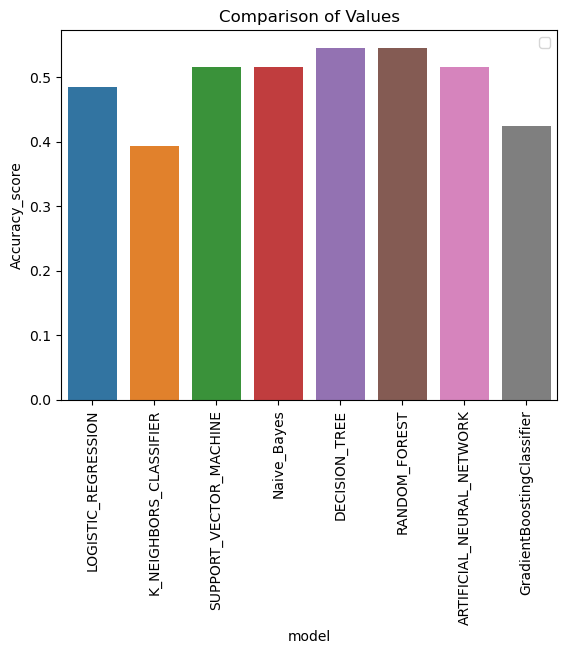

In [48]:
# Creating a dictionary for the model and their corresponding to the accuracy_score
comparison_dict={
    'model':['LOGISTIC_REGRESSION','K_NEIGHBORS_CLASSIFIER','SUPPORT_VECTOR_MACHINE','Naive_Bayes','DECISION_TREE','RANDOM_FOREST',
             "ARTIFICIAL_NEURAL_NETWORK",'GradientBoostingClassifier'],
      'Accuracy_score':[LogisticRegression_accuracy_score,KNeighborsClassifier_accuracy_score,
                        SVC_accuracy_score,GaussianNaiveBayes_accueacy_score,DecisionTreeClassifier_accueacy_score,
                        RandomForestClassifier_accuracy_score,MLPClassifier_accuracy_score,
                        GradientBoostingClassifier_accuracy_score]}

# Creating dataframe 
comparison_df=pd.DataFrame(comparison_dict)




#visualizing the Comparison_df dataframe
sns.barplot(x='model', y='Accuracy_score', data=comparison_df )
plt.xlabel('model')
plt.ylabel('Accuracy_score')
plt.title('Comparison of Values')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [49]:
# Creating a dictionary for the model and their corresponding to the accuracy_score
comp_dict={
    'model':['LOGISTIC_REGRESSION','K_NEIGHBORS_CLASSIFIER','SUPPORT_VECTOR_MACHINE','Naive_Bayes','DECISION_TREE','RANDOM_FOREST',
             "ARTIFICIAL_NEURAL_NETWORK",'GradientBoostingClassifier'],
      'Accuracy_score':[LogisticRegression_accuracy_score,KNeighborsClassifier_accuracy_score,
                        SVC_accuracy_score,GaussianNaiveBayes_accueacy_score,DecisionTreeClassifier_accueacy_score,
                        RandomForestClassifier_accuracy_score,MLPClassifier_accuracy_score,
                        GradientBoostingClassifier_accuracy_score]}
# Creating dataframe 
comp_df=pd.DataFrame(comp_dict)

#sorting the dataframe by the r2_score column in descending order
comp_df=comp_df.sort_values(by='Accuracy_score', ascending=False)

# Setting the index as the model column
comp_df=comp_df.set_index('model')

# Visualizing the dataframe
print('The DataFrame showing performance of different models:')
print("")
print(comp_df)

The DataFrame showing performance of different models:

                            Accuracy_score
model                                     
DECISION_TREE                     0.545455
RANDOM_FOREST                     0.545455
SUPPORT_VECTOR_MACHINE            0.515152
Naive_Bayes                       0.515152
ARTIFICIAL_NEURAL_NETWORK         0.515152
LOGISTIC_REGRESSION               0.484848
GradientBoostingClassifier        0.424242
K_NEIGHBORS_CLASSIFIER            0.393939


## CONCLUSION
Among various classification models applied to the Teaching Assistant Evaluation dataset,  Decision Tree  and  Random Forest  achieved the highest accuracy of  54.55% , indicating moderate predictive capability. Models like  Support Vector Machine , Naive Bayes , and  Artificial Neural Network  followed closely with accuracies around  51.52% , while  Logistic Regression  and  Gradient Boosting  performed lower. The relatively modest accuracy across models suggests that the dataset may lack strong predictive features or exhibit inherent variability.



## 10. REPORT ON CHALLENGES FACED

1.In this dataset, the limited amount of data and features makes it challenging for the model to analyze trends effectively.

2.Balancing model complexity is challenging due to the small and simple dataset.

3.High cardinality in categorical features (like course and instructor) complicates pattern extraction.

4.Models like Decision Trees and Random Forests showed moderate accuracy (~54.55%), while others underperformed, likely due to data limitations.

# Project Details:
### Project Team ID:
PTID-CDS-JAN-25-2367
    
### Project ID:
PRCP_1026_Teaching_Assistance


### Team Members:
    
     
    1.RAJESH KANNAN - rajeshkannanemailpdkt@gmail.com
    2.THIRUMALAI  -thiru292004@gmail.com
    3.SABARISHAN  -sabarishan342002@gmail.com
    4.VIMAL RAJ J - mrvimalofficiall@gmail.com
    